# Job Listing Integrity Investigation

**Group 4:** Dian Jin, Mingze Wu, Tanvi Sheth, Sneha Sunil Ekka, Jenil Shah

**Motivation**

As graduate students entering the job market, we spend most of our time exploring job opportunities online. It is important for us to be able to trust the platform where we share our data. This is why having the knowledge of real or fake job postings is so important.


**Problem Statement**

The main objective of this project is to leverage Natural Language Processing algorithms in order to process textual job postings and draw out patterns that distinguish fraudulent jobs from real ones. There is a critical need for an automated, reliable solution that can enhance the detection of fraudulent postings, improve platform integrity, and ensure a safe, trustworthy environment for both recruiters and job seekers.


**Business Relevance**

From a business standpoint, implementing a solution is crucial for platforms like LinkedIn and Handshake. By enhancing fraud detection accuracy, these platforms can create a safer environment for both - recruiters and job seekers, trust and satisfaction. Furthermore, these insights can guide strategic decisions and market trend analysis, facilitating business growth and enhancing goodwill among users.

**Dataset & Data Source**

The dataset - Real / Fake Job Posting Prediction is from Kaggle, retrieved from [this link](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction?resource=download). The dataset has 17880 job postings and 18 features including job descriptions, company profiles, benefits, requirements, and a binary indicator of whether a posting is real or fake. The data consists of both textual information and meta-information about the jobs.

**Data Dictionary**

| Columns | description |
|----|----|
| job_id | Unique Job ID |
| title | The title of the job ad entry |
| location | Geographical location of the job ad |
| department | Corporate department (e.g. sales) |
| salary_range | Indicative salary range |
| company_profile | A brief company description |
| description | The details description of the job ad |
| requirements | Enlisted requirements for the job opening |
| benefits | Enlisted offered benefits by the employer |
| telecommuting | True for telecommuting positions |
| has_company_logo | True if company logo is present |
| has_questions | True if screening questions are present |
| employment_type | Full-type, Part-time, Contract, etc. |
| required_experience | Executive, Entry level, Intern, etc. |
| required_education | Doctorate, Master's Degree, Bachelor, etc. |
| industry | Automotive, IT, Health care, Real estate, etc. |
| function | Consulting, Engineering, Research, Sales etc. |
| fraudulent | target - Classification attribute |

## Importing Libraries

# Part 1
---

In [1]:
# Data Structures
import numpy  as np
import pandas as pd

# Corpus Processing
import re
# import string
import nltk
import nltk.corpus
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# Visualization and Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.metrics import silhouette_samples, silhouette_score

# K-Means
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

colors = px.colors.qualitative.Pastel
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Loading the Data

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tanvisheth22
Your Kaggle Key: ··········


100%|██████████| 16.1M/16.1M [00:00<00:00, 103MB/s] 

In [4]:
!pip install your-package-name

In [5]:
data = pd.read_csv('/content/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## Cleaning the Data

In [7]:
# Checking for NULLs in the data
nan_counts = data.isnull().sum()
nan_percent = data.isnull().sum()/data.shape[0]
nans_dict = {'count_of_nans':nan_counts, 'percent_of_nans':nan_percent}

pd.DataFrame(nans_dict).sort_values('percent_of_nans')

,count_of_nans,percent_of_nans
job_id,0,0.000000
has_questions,0,0.000000
has_company_logo,0,0.000000
telecommuting,0,0.000000
fraudulent,0,0.000000
title,0,0.000000
description,1,0.000056
location,346,0.019351
requirements,2695,0.150727
company_profile,3308,0.185011


In [8]:
# Dropping NAN value in the 'description' column
data.dropna(subset=['description'], inplace=True)
data.shape

(17879, 18)

In [9]:
# Verifying the categorical nature of some columns
columns = ['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','fraudulent']
cat_check = data[columns]
unique = cat_check.apply(lambda col: col.unique())
pd.DataFrame(unique, columns=['Unique Values'])

,Unique Values
telecommuting,"[0, 1]"
has_company_logo,"[1, 0]"
has_questions,"[0, 1]"
employment_type,"[Other, Full-time, nan, Part-time, Contract, T..."
required_experience,"[Internship, Not Applicable, nan, Mid-Senior l..."
required_education,"[nan, Bachelor's Degree, Master's Degree, High..."
fraudulent,"[0, 1]"


In [10]:
# Filling missing values in categorical columns with "Not Specified"
categorical_columns = ['employment_type', 'required_experience', 'required_education']
for column in categorical_columns:
    data[column].fillna('Not Specified', inplace=True)

# Collapsing 'Unspecified' and 'Not Specified' in the 'required_education' column into a single category
data.loc[data['required_education'] == 'Unspecified', 'required_education'] = 'Not Specified'

In [11]:
# Changing the datatypes of categorical columns to 'category'
data = data.astype({'telecommuting':'category', 'has_company_logo':'category', 'has_questions':'category', 'fraudulent':'category',
                    'employment_type':'category', 'required_experience':'category', 'required_education':'category'})

In [12]:
# Filling missing textual columns with empty strings
textual_columns = ['company_profile', 'description', 'requirements', 'benefits']
for column in textual_columns:
    data[column].fillna('', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17879 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   job_id               17879 non-null  int64   
 1   title                17879 non-null  object  
 2   location             17533 non-null  object  
 3   department           6333 non-null   object  
 4   salary_range         2868 non-null   object  
 5   company_profile      17879 non-null  object  
 6   description          17879 non-null  object  
 7   requirements         17879 non-null  object  
 8   benefits             17879 non-null  object  
 9   telecommuting        17879 non-null  category
 10  has_company_logo     17879 non-null  category
 11  has_questions        17879 non-null  category
 12  employment_type      17879 non-null  category
 13  required_experience  17879 non-null  category
 14  required_education   17879 non-null  category
 15  industry           

In [13]:
# Checking for NULLs again
nan_counts = data.isnull().sum()
nan_percent = data.isnull().sum()/data.shape[0]
nans_dict = {'count_of_nans':nan_counts, 'percent_of_nans':nan_percent}

nans_df = pd.DataFrame(nans_dict).sort_values('percent_of_nans')
nans_df[nans_df.count_of_nans > 0]

,count_of_nans,percent_of_nans
location,346,0.019352
industry,4902,0.274176
function,6454,0.360982
department,11546,0.645786
salary_range,15011,0.839588


In [14]:
## Investigating the 'salary_range' column
data['salary_range'].unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [15]:
# Checking no of rows that have bad values in 'salary_range'
salary_not_null = data[~ data['salary_range'].isna()]
salary_check_df = salary_not_null[salary_not_null['salary_range'].str.contains('[a-zA-Z]')]
salary_check_df.shape

(26, 18)

In [16]:
# Getting rid of the above rows that contain dates in the 'salaray_range'
indices_to_drop = salary_check_df.index

# Obtaining the cleaned data
data.drop(indices_to_drop, inplace=True)

# Resetting the index
data.reset_index(drop=True, inplace=True)
data.shape

(17853, 18)

**Note:**

For the `salary_range` column, we see that in addition to approximately 84% of the data being missing, the values are not all in the same format. We can see a few dates along with the minimum and maximum salary values. We also know from the `location` column that job listings are spead out through the world. Looking at the values, it is fair to assume that the salary ranges given are in their respective local currencies.

One way to handle this data is to get rid of the date format values and convert the local currencies to USD for a more standardized analysis. This however, raises the risk of introducing a mismatch in the salary values for comparable global job roles.

We also acknowledge that some companies do not prefer disclosing the salary range prior to making an offer to a candidate, so it isn't essential for all values in the salary_range column to be non-null.

In [17]:
# Investigating the 'department' column
list(data['department'].unique())

['Marketing',
 'Success',
 nan,
 'Sales',
 'ANDROIDPIT',
 'HR',
 ' R&D',
 'Engagement',
 'Businessfriend.com',
 'Medical',
 'Field',
 'All',
 'Design',
 'Production',
 'ICM',
 'General Services',
 'Engineering',
 'IT',
 'Business Development',
 'Human Resources',
 'Oil & Energy',
 'Marketplace',
 'Cloud Services',
 'FP',
 'Client Services',
 'Operations',
 'Materials',
 'tech',
 'Sales and Business Development',
 'R&D',
 'Development',
 'Incubation Services',
 'Field Operations',
 'MKT',
 'Technology',
 'Power Plant & Energy',
 'Approvals Department',
 'Playfair Capital',
 'Development ',
 'Tech',
 'Software development',
 'Media',
 'Line-Up',
 'Management',
 'Squiz ',
 'Finance',
 'Financial',
 'Retail',
 'Marketing and Communications',
 'Research',
 'Connectivity',
 'PMO',
 'Product',
 'Student Beans Mag',
 'Information Technology Group',
 'DTVMA',
 'G&A',
 'Implementations',
 'OPS',
 'Partnership Management',
 'Professional Services',
 'Customer Care',
 'Account Management',
 'EC',


In [18]:
# Dropping the 'department' column
data.drop('department', axis=1, inplace=True)

**Note:**

In the `department` column, the data is very vague with locations and numbers included. There are also a few entries with job roles and job titles in place of the department name or function.

Since there is no way to verify the correctness of the data, using it for the analysis would compromise the integrity of the data. For this reason, we decided to drop the `department` column.

In [19]:
# Investigating the 'function' column
data['function'].unique()

array(['Marketing', 'Customer Service', nan, 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

In [20]:
# Investigating the 'industry' column
data['industry'].unique()

array([nan, 'Marketing and Advertising', 'Computer Software',
       'Hospital & Health Care', 'Online Media',
       'Information Technology and Services', 'Financial Services',
       'Management Consulting', 'Events Services', 'Internet',
       'Facilities Services', 'Consumer Electronics',
       'Telecommunications', 'Consumer Services', 'Construction',
       'Oil & Energy', 'Education Management', 'Building Materials',
       'Banking', 'Food & Beverages', 'Food Production',
       'Health, Wellness and Fitness', 'Insurance', 'E-Learning',
       'Cosmetics', 'Staffing and Recruiting',
       'Venture Capital & Private Equity', 'Leisure, Travel & Tourism',
       'Human Resources', 'Pharmaceuticals', 'Farming', 'Legal Services',
       'Luxury Goods & Jewelry', 'Machinery', 'Real Estate',
       'Mechanical or Industrial Engineering',
       'Public Relations and Communications', 'Consumer Goods',
       'Medical Practice', 'Electrical/Electronic Manufacturing',
       'Hospita

In [21]:
# Investigating the 'location' column
data['location'].unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

In [22]:
# Extracting 'country' from 'location' column
data['country'] = data['location'].str[:2]

**Note:**

The `location` column has very inconsistent data, with missing values, states and cities missing for quite a few rows. We are creating a new column - `country` by extracting just the first two letters (the country code) from the location column to analyse further.

In [23]:
# Filling missing values in other columns with "Not Specified"
other_columns = ['location', 'country', 'industry', 'function', 'salary_range']
for column in other_columns:
    data[column].fillna("Not Specified", inplace=True)

In [24]:
data.isna().sum()

job_id                 0
title                  0
location               0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

## Preprocessing Text Data With NLP

### Functions

In [25]:
def keepWords(listOfTokens, listOfWords):
    '''retains a list of words from a tokenized list'''
    return [token for token in listOfTokens if token in listOfWords]

def removeWords(listOfTokens, listOfWords):
    '''removes a list of words (ie. stopwords) from a tokenized list'''
    return [token for token in listOfTokens if token not in listOfWords]

def extremeWords(listOfTokens):
    '''collects words composed of less than 2 or more than 21 letters'''
    extremeWords = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            extremeWords.append(token)
    return extremeWords

### Tokenization

In [26]:
def tokenize_text(text):

    # Converting any non-string data to string
    text = str(text)

    # Converting all text to lowercase
    text = text.lower()

    # Replacing the matched characters with an empty string
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Replace the unmatched characters with an empty string
    text = text.replace(u'\ufffd', '8')         # Replaces the ASCII '�' symbol with '8'
    text = re.sub("\S*@\S*\s?", '', text)       # removes emails and mentions (words with @)
    text = re.sub('http\S+', '', text)          # removes URLs with http
    text = re.sub('www\S+', '', text)           # removes URLs with www

    # Tokenizing text
    tokens = word_tokenize(text)

    # Further cleaning the tokens
    stop_words = list(set(stopwords.words('english')))
    extreme_words = extremeWords(tokens)
    tokens = removeWords(tokens, stop_words)
    tokens = removeWords(tokens, extreme_words)

    # Stemming & Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]

    # Rejoining the tokens into a string
    text = " ".join(tokens)

    return text

### Vectorizarion

In [27]:
def vectorize_text():
    '''returns a model'''
    tfidf_vectorizer = TfidfVectorizer(norm=None)
    return tfidf_vectorizer

## EDA & Visualisations

### Exploratory Plots

In [28]:
# Plotting Distribution of Employment Types

employment_counts = data['employment_type'].value_counts().reset_index()
employment_counts.columns = ['employment_type', 'count']

# Plot using Plotly
fig = px.bar(employment_counts,
             y='employment_type',
             x='count',
             color='employment_type',
             orientation='h',
             title='Plot 1: Distribution of Employment Types',
             labels={'count': 'Count', 'employment_type': 'Employment Type'},
             color_discrete_sequence=colors[2:]
            )

fig.show()

**Insights:**

We have quite a few entries with no Employment type mentioned. However, the majority of the roles provided by the companies are for full-time roles.

In [29]:
# Plotting Distribution of Required Education for Job Postings

required_education = data['required_education'].value_counts().reset_index()
required_education.columns = ['required_education', 'count']

fig = px.bar(required_education,
             y='required_education',
             x='count',
             color='required_education',
             orientation='h',
             title='Plot 2: Distribution of Required Education for Job Postings',
             labels={'count': 'Count', 'required_education': 'Required Education'},
             color_discrete_sequence=colors[2:]
            )

fig.show()

**Insights:**

Majority of the job postings do not explicitly specify degree requirements. So we will be analysing the `requirements` column further to see if these specifications are mentioned in the text.

Other than that, we see that Bachelor's degree is the most commonly qualification required for these job listings.

In [30]:
# Plotting Top 10 Industries Represented in Job Postings

top_industries = data['industry'].value_counts().reset_index().head(10)
top_industries.columns = ['industry', 'count']

fig = px.bar(top_industries,
             y='industry',
             x='count',
             color='industry',
             orientation='h',
             title='Plot 3: Top 10 Industries Represented in Job Postings',
             labels={'count': 'Count', 'industry': 'Industry'},
             color_discrete_sequence=colors[2:]
            )
fig.show()

**Insights:**

Similar to the `required_education` column, we see that companies do not usually tag their industries on the job portals while listing a job requirement. These details will be further looked at while analysing the `company_profile` column.

For the categories mentioned, we see a dominance of technology companies providing IT, Computer Software and Interet-based services followed by Marketing and Advertising.

In [31]:
# Plotting Distribution of Job Postings With and Without Company Logo

# Creating a copy of data for plots
plot_df = data.copy()
plot_df['fraudulent'] = plot_df['fraudulent'].map({0: "Real", 1: "Fake"})

fig = px.histogram(plot_df, x='has_company_logo', color='fraudulent', barmode='group', category_orders={'has_company_logo': ['f', 't']}, color_discrete_sequence=colors)

fig.update_layout(
    title='Plot 4: Distribution of Job Postings With and Without Company Logo',
    xaxis_title='Has Company Logo',
    yaxis_title='Count',
    width=800,
    height=600,
    legend_title_text='Fraudulent'
)
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['No', 'Yes']))

fig.show()

**Insights:**

Companies usually include their logo while posting a job on a platform. This includes both real and fraudulent job listings. However, the proportion of fraudulent job listings without a company logo is much higher. This would give the platform a chance to verify the credibility of the job listing.

In [32]:
# Plotting Distribution of Telecommuting Job Postings
fig = px.histogram(plot_df, x='telecommuting', color='fraudulent', barmode='group', category_orders={'telecommuting': ['f', 't']}, color_discrete_sequence=colors)

fig.update_layout(
    title='Plot 5: Distribution of Telecommuting Job Postings',
    xaxis_title='Telecommuting',
    yaxis_title='Count',
    width=800,
    height=600,
    legend_title_text='Fraudulent'
)
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['No', 'Yes']))

fig.show()

**Insights:**

90% of the job listings do not provide the telecommuting or work-from-home option. This means that the jobs require the employees to be present in the office. Here we can also see that even though the count is smaller, the number of fraudulent job listings with the telecommuting option is approximately 10% of the total jobs that provide that option.

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1 = data.copy()

# removing not specified from the country column
df1 = df1[df1['country'] != 'Not Specified']

country_counts = df1.groupby(['country', 'fraudulent']).size().unstack(fill_value=0)

country_counts['total'] = country_counts.sum(axis=1)

country_counts = country_counts.sort_values(by='total', ascending=False)

top_fraudulent_countries, top_non_fraudulent_countries = [country_counts.nlargest(10, 1), country_counts.nlargest(10, 0)]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 10 Fraudulent Countries", "Top 10 Non-Fraudulent Countries"))


fig.add_trace(go.Bar(x=top_fraudulent_countries.index, y=top_fraudulent_countries[1], name='Fraudulent', marker = {'color' : colors[0]}),
              row=1, col=1)

fig.add_trace(go.Bar(x=top_non_fraudulent_countries.index, y=top_non_fraudulent_countries[0], name='Non-Fraudulent', marker = {'color' : colors[1]}),
              row=1, col=2)

fig.update_layout(title="Plot 6: Top 10 Fraudulent and Non-Fraudulent Countries", showlegend=False)
fig.show()

**Insights:**

We can see that US has the highest job listings in both categories - fraudulent and real (non-fraudulent). For Australia (AU), we see a surprisingly high proportion of fraudulent cases compared to other countries. Germany (GR) on the other hand has negligible fraudulent cases.

**References:**

[Documentation for Plotly](https://plotly.com/python/plotly-express/)

[Documentation for Plotly Graphs](https://plotly.com/python/graph-objects/)

### Word Clouds for Text Columns

Wordcloud for company_profile


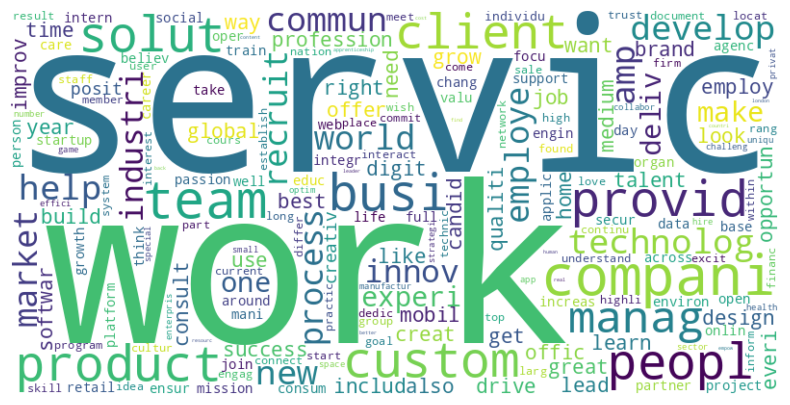

Wordcloud for description


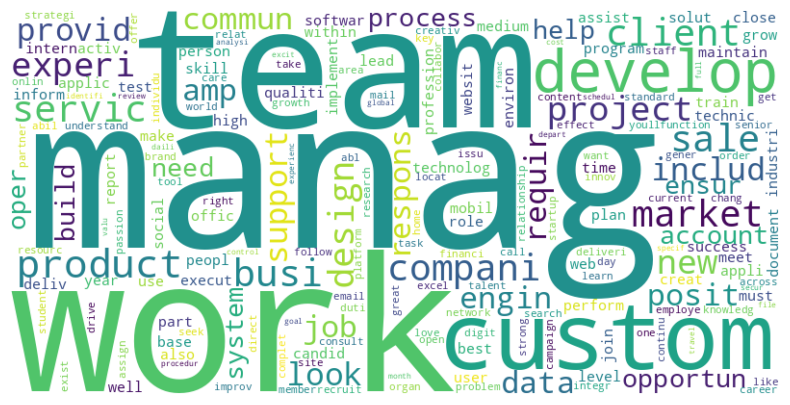

Wordcloud for requirements


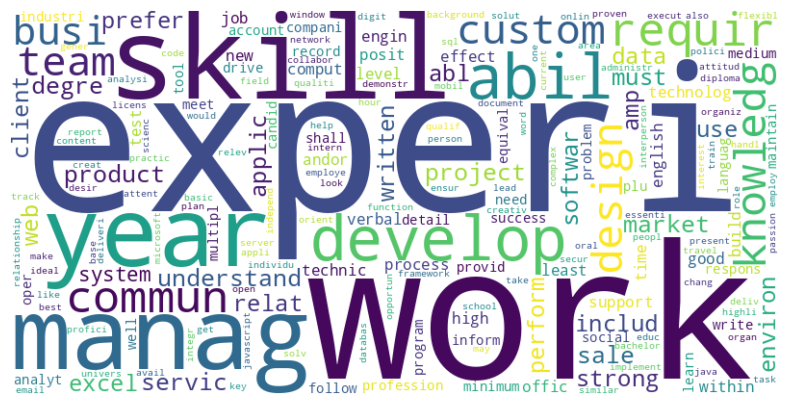

Wordcloud for benefits


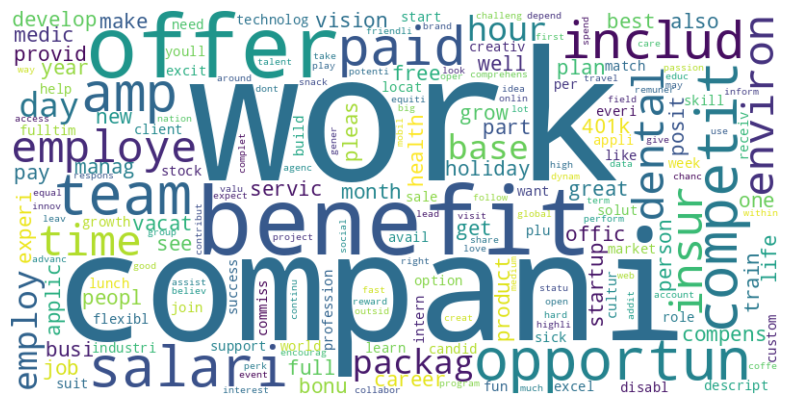

In [34]:
text_columns = ['company_profile', 'description', 'requirements', 'benefits']

# Creating a list to hold TF-IDF vectors for each text column
tfidf_vector_list = []

for column in text_columns:

  # Applying preprocessing to the dataset
  data_processed = data[column].apply(tokenize_text)

  # Vetorization
  vectorizer = vectorize_text()
  df_tfidf_transformed = vectorizer.fit_transform(data_processed)
  tfidf_vectors = pd.DataFrame(df_tfidf_transformed.toarray(), columns=vectorizer.get_feature_names_out())
  tfidf_vector_list.append(tfidf_vectors)

  # Plotting the word cloud for each column
  print('Wordcloud for', column)

  wordcloud_data = tfidf_vectors.sum(axis=0)  # Sum the TF-IDF vectors for each word
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Insights:**

In all the word-clouds, we can see that all companies put a lot of importance on the **team** and it is an important factor in all roles, whether it is a requirement from the applicant or the company itself. A strong and supportive team and team-members are what make a company successful.

`company_profile`:

The most prominent words in the company_profile column are services, business, solutions, work, clients and team. This gives us a peek into the company culture, which considers their clients a priority and believe in a healthy team-building culture.

`description`:

The description column which gives us information about the job profile very strongly focuses on team work followed by client, business and sales. This reinforces our point about how important teams are in a successful company.

`requirements`:

This column gives us the basic qualifications required for any job listing. We can see that experience, skills, ability are at the forefront. Based on our analysis above, where companies do not specify the basic qualifications, we can see that recruiters are now preferring their experience and skills over a degree or a certification.

`benefits`:

Here, we see that opportunity, competitive salary, insurance are all aspects that a company promises to their canditates.


**Reference:** [Documentation for WordCloud](https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/)

# Part 2
---

**Subsetting the dataset for PCA**

In [35]:
data_sampled = data.sample(frac=0.2, random_state=1)
data_sampled.shape

(3571, 18)

**Note:**

In order to check the most influential word tokens in our textual columns, we need to take a sample of our original data to check the feasability of the dimensionality reduction procedure.

We will be considering all these columns independent of each other so as to not cause any spillovers.

In [36]:
# Preprocessing and tokenization for 'company_profile' column
corpus_profile = data_sampled['company_profile'].apply(tokenize_text)

# Vectorization
tfidf_vectorizer = vectorize_text()
X = tfidf_vectorizer.fit_transform(corpus_profile)
tfidf_profile = pd.DataFrame(data = X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [37]:
# Preprocessing and tokenization for 'description' column
corpus_description = data_sampled['description'].apply(tokenize_text)

# Vectorization
tfidf_vectorizer = vectorize_text()
X = tfidf_vectorizer.fit_transform(corpus_description)
tfidf_description = pd.DataFrame(data = X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [38]:
# Preprocessing and tokenization for 'requirements' column
corpus_requirements = data_sampled['requirements'].apply(tokenize_text)

# Vectorization
tfidf_vectorizer = vectorize_text()
X = tfidf_vectorizer.fit_transform(corpus_requirements)
tfidf_requirements = pd.DataFrame(data = X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [39]:
# Preprocessing and tokenization for 'benefits' column
corpus_benefits = data_sampled['benefits'].apply(tokenize_text)

# Vectorization
tfidf_vectorizer = vectorize_text()
X = tfidf_vectorizer.fit_transform(corpus_benefits)
tfidf_benefits = pd.DataFrame(data = X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

## Dimensionality Reduction

In [40]:
# For the 'company_profile' column
lsa = make_pipeline(TruncatedSVD(100), Normalizer(copy=False))
X_lsa_profile = lsa.fit_transform(tfidf_profile)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step for 'company_profile': {explained_variance * 100:.1f}%")

Explained variance of the SVD step for 'company_profile': 58.6%


In [41]:
# For the 'description' column
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa_description = lsa.fit_transform(tfidf_description)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step for 'description': {explained_variance * 100:.1f}%")

Explained variance of the SVD step for 'description': 35.0%


In [42]:
# For the 'requirements' column
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa_requirements = lsa.fit_transform(tfidf_requirements)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step for 'requirements': {explained_variance * 100:.1f}%")

Explained variance of the SVD step for 'requirements': 35.8%


In [43]:
# For the 'benefits' column
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa_benefits = lsa.fit_transform(tfidf_benefits)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step for 'benefits': {explained_variance * 100:.1f}%")

Explained variance of the SVD step for 'benefits': 60.6%


**Note:**

We have used TruncatedSVD instead of PCA since we have textual data to process. In the next steps, we would evaluate the significance of the LSA model.

**Reference:** [Documentation for LSA](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#performing-dimensionality-reduction-using-lsa)

## Clustering

**Note:** Clustering done on the `benefits` column only

In [44]:
# Function for running KMeans
k = 2
kmeans = KMeans(n_clusters = k
                    # , init = 'k-means++'
                    , n_init = 1  # 10
                    , max_iter = 100
                    # , tol = 0.0001
                    # , random_state = 1
                    # , algorithm = 'lloyd'
                    )

In [45]:
# Clustering on 'benefits' column
final_benefits_df = pd.DataFrame(X_lsa_benefits)
kmeans_results_benefits = kmeans.fit(final_benefits_df)

In [46]:
# Getting top 10 words for each cluster
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(2):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: work benefit salari competit offer opportun compani base team paid 
Cluster 1: job see descript provid skill salari product mobil solut build 


**Insights:**

We wanted to explore K-Means clustering for our data, so we executed the model to one textual column - `benefits`.

By implementing K-means clustering on the sample column, we attempted to find the top 10 words that affect the cluster formation.

Our initial intent was to cluster our text data into two groups - fraudulent and non-fraudulent, to align with our predefined labels. However, we learnt that clustering textual data doesn't work with pre-defined notions and the result might not be as expected. Due to this, we decided to not go ahead with clustering and tried Classification algortihms on the sample data.

# Part 3
---

## Classification

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix

text_columns = ['company_profile', 'description', 'requirements', 'benefits']

def classification(text_column):

    # Preprocessing and tokenization
    corpus = data_sampled[text_column].apply(tokenize_text)

    # Vectorization
    tfidf_vectorizer = vectorize_text()
    X = tfidf_vectorizer.fit_transform(corpus)
    tfidf_df = pd.DataFrame(data = X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Train-test split
    X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_df, data_sampled['fraudulent'], test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)

    return print(classification_report(y_test, y_pred))

In [48]:
classification('company_profile')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       678
           1       1.00      0.32      0.49        37

    accuracy                           0.97       715
   macro avg       0.98      0.66      0.74       715
weighted avg       0.97      0.97      0.96       715



In [49]:
classification('description')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       678
           1       0.75      0.24      0.37        37

    accuracy                           0.96       715
   macro avg       0.86      0.62      0.67       715
weighted avg       0.95      0.96      0.95       715



In [50]:
classification('requirements')

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       678
           1       0.53      0.22      0.31        37

    accuracy                           0.95       715
   macro avg       0.75      0.60      0.64       715
weighted avg       0.94      0.95      0.94       715



In [51]:
classification('benefits')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       678
           1       0.79      0.30      0.43        37

    accuracy                           0.96       715
   macro avg       0.87      0.65      0.71       715
weighted avg       0.95      0.96      0.95       715



**Insights:**

Here, we ran a basic Logistic Regression model to classify the textual columns into fraudulent and non-fraudulent entries. The model currently is being run on sample data, one textual column at a time to check its relevance.

**Next Steps:**

In the potential next steps, we would be including the categorical columns along with the textual columns for classification. In place of LSA and Clustering, we would explore word embedding techniques such as Word2Vec and GloVe in order to reduce the number of relevant tokens and consider only the significant ones for classification. Our final aim is to use the categorical and textual columns together in order to classify the job listings as fraudulent or not.

----